A HIERARCHICAL CLUSTERING OF GRAIN SAMPLES

In [37]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('/content/seeds.csv')

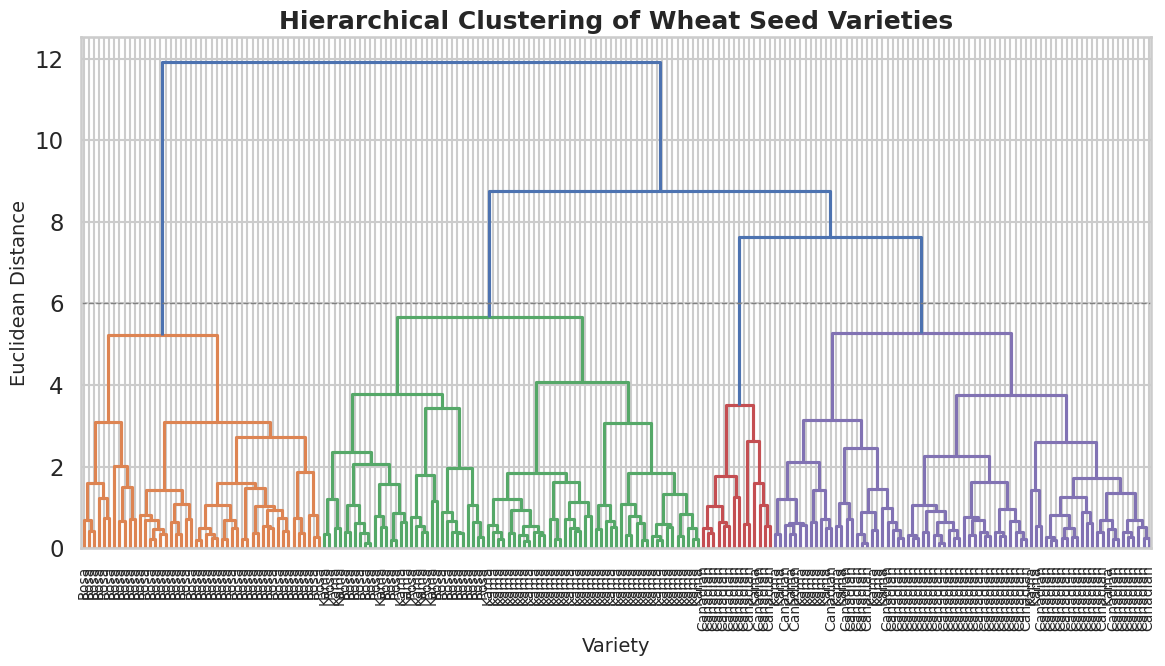

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

samples = data.iloc[:, :-1].values
labels = data.iloc[:, -1].astype(int)

# Map numeric labels → wheat varieties
varieties = ['Kama' if label == 1 else 'Rosa' if label == 2 else 'Canadian' for label in labels]

# Compute linkage (try 'complete' or 'average' for balanced clusters)
mergings = linkage(samples, method='complete')

# Seaborn styling
sns.set(style="whitegrid", context="talk")

# Create a larger, clean figure
plt.figure(figsize=(12, 7))
dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=6  # Adjust to highlight ~3 major clusters
)

# Optional cluster cutoff line
plt.axhline(y=6, color='gray', linestyle='--', linewidth=1)

# Titles and labels
plt.title("Hierarchical Clustering of Wheat Seed Varieties", fontsize=18, fontweight='bold')
plt.xlabel("Variety", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.tight_layout()
plt.show()


HIERARCHICAL CLUSTERING OF COMPANIES ACCORDING TO THEIR STOCK PRICE MOVEMENTS

In [40]:
# Import normalize
from sklearn.preprocessing import normalize

In [41]:
movements = pd.read_csv('/content/company-stock-movements-2010-2015-incl.csv')

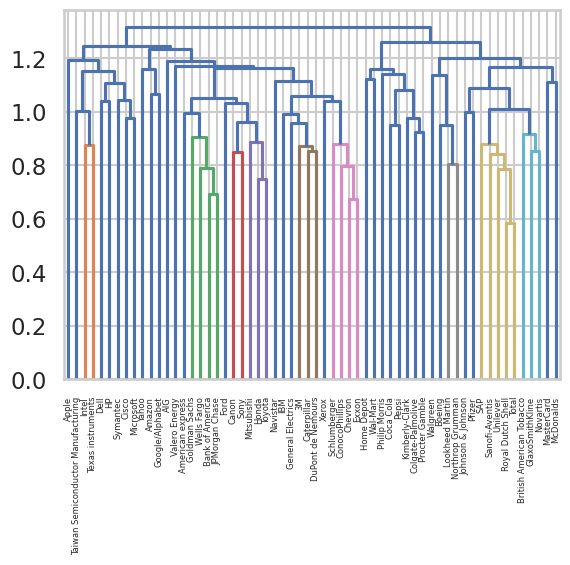

In [42]:
# Extract the company names and movements data
companies = movements.iloc[:, 0].values
movements_data = movements.iloc[:, 1:]

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements_data)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

PEFORM A HIERARCHICAL CLUSTERING OF THE VOTING COUNTRIES WITH 'SINGLE' LINKAGE

In [43]:
samples = pd.read_csv('/content/eurovision-2016.csv')

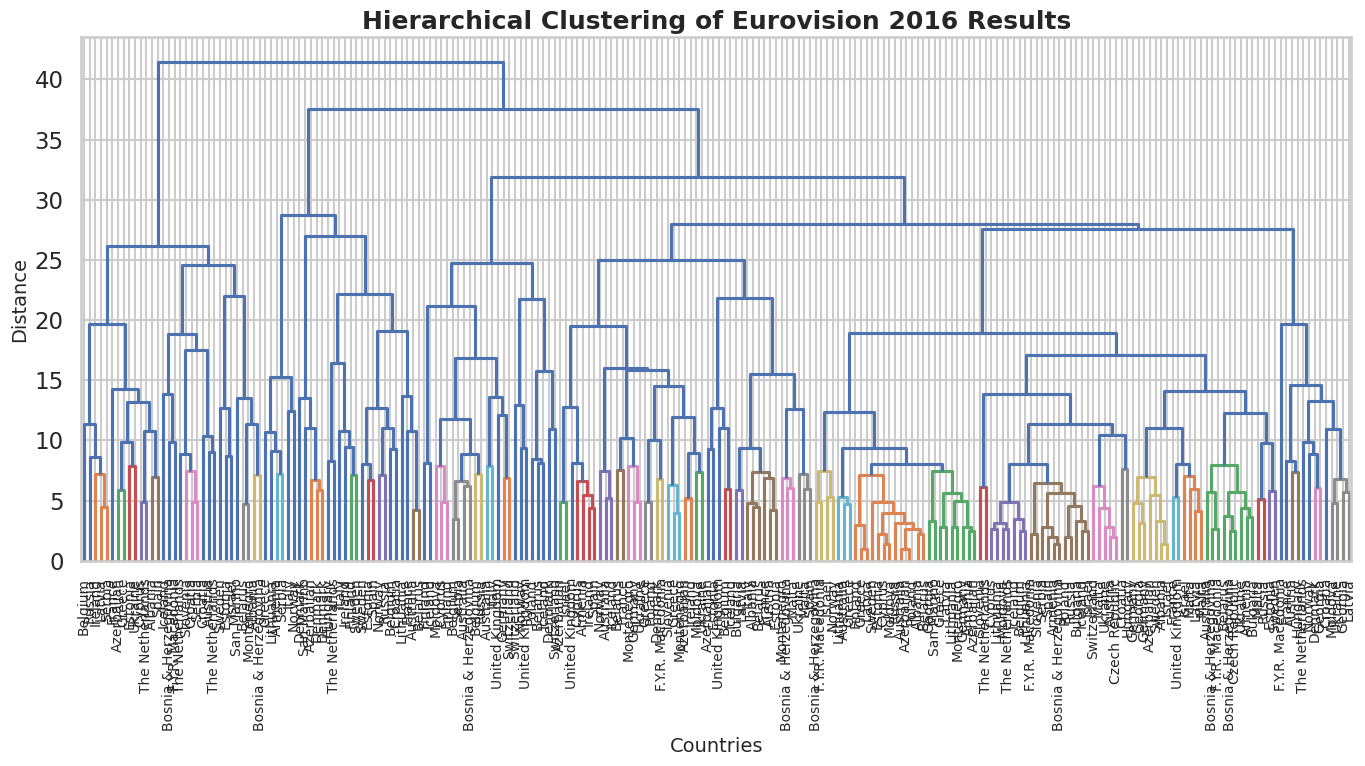

In [44]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import seaborn as sns

# Load & clean data
samples = pd.read_csv('/content/eurovision-2016.csv', encoding='utf-8-sig')
samples_cleaned = samples.dropna(subset=['Jury Points', 'Televote Points'])

# Extract data
country_names = samples_cleaned.iloc[:, 0].values
clustering_data = samples_cleaned.iloc[:, 2:].values.astype(float)

# Compute linkage
mergings = linkage(clustering_data, method='complete')  # 'complete' or 'average' works better visually

# Style setup
sns.set(style="whitegrid", context="talk")  # bigger text, cleaner grid

# Plot
plt.figure(figsize=(14, 8))  # increase figure size
dendrogram(
    mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=8  # helps color clusters
)
plt.title("Hierarchical Clustering of Eurovision 2016 Results", fontsize=18, fontweight='bold')
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.tight_layout()
plt.show()


The intermediate clustering of the grain samples at height 6 has 3 clusters. Using the fcluster() function to extract the cluster labels for this intermediate clustering, and comparing the labels with the grain varieties using a cross-tabulation.

In [47]:
# 1. Import dependencies
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 2. Load the dataset
data = pd.read_csv('/content/seeds.csv')

# 3. Separate features (samples) and labels (varieties)
samples = data.iloc[:, :-1].values
labels = data.iloc[:, -1].astype(int)
varieties = ['Kama' if label == 1 else 'Rosa' if label == 2 else 'Canadian' for label in labels]

# 4. Perform hierarchical clustering
mergings = linkage(samples, method='complete')

# 5. Cut the dendrogram at height = 6 to get 3 clusters
cluster_labels = fcluster(mergings, 6, criterion='distance')

# 6. Create a DataFrame with labels and varieties
df = pd.DataFrame({'labels': cluster_labels, 'varieties': varieties})

# 7. Cross-tabulate clusters vs varieties
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)


varieties  Canadian  Kama  Rosa
labels                         
1                 0     0    47
2                 0    51    23
3                13     1     0
4                57    17     0


t-DISTANCE STOCHASTIC NEIGHBOR EMBEDDING (t-SNE)

APPLY t-SNE TO THE GRAIN SAMPLES DATA AND INSPECT THE RESULTING  t-SNE FEATURES USING SCATTER PLOT

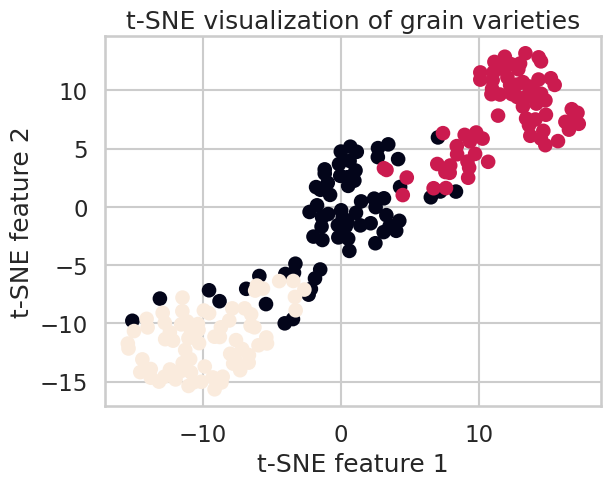

In [52]:
# Import TSNE
from sklearn.manifold import TSNE

data = pd.read_csv('/content/seeds.csv')

# Compute t-SNE features
model = TSNE(learning_rate=100, random_state=0)
tsne_features = model.fit_transform(samples)

# Extract x and y coordinates
x = tsne_features[:, 0]
y = tsne_features[:, 1]

variety_numbers = data.iloc[:, -1].astype(int).tolist() #a list variety_numbers giving the variety number of each grain sample

# Plot and color by variety number
plt.scatter(x, y, c=variety_numbers)
plt.title('t-SNE visualization of grain varieties')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


Apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market

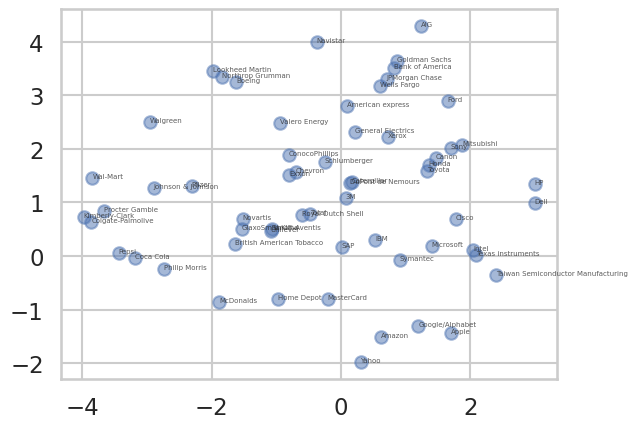

In [53]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
